# Исследование закономерностей успешности игр в интернет-магазине "Стримчик"

**Описание проекта**

Для интернет-магазина, который продаёт по всему миру компьютерные игры, необходимо провести анализ рынка игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    - «E» («Everyone») - все
    - «T» («Teen») от 13 лет
    - «M» («Mature») от 17 и старше
    - «E10+» («Everyone 10 and older») - от 10 и старше
    - «EC» («Early childhood») - от 3 лет
    - «RP» («Rating Pending») - рейтинг ожидается
    - «AO» («Adults Only 18+») - только для взрослых - от 18 лет
    - "K-A" ("Kids to Adults") - для всех, тоже самое, что «E» («Everyone»). старый вариант

Данные за 2016 год могут быть неполными.

## Откроем файл с данными и изучим общую информацию.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
data = pd.read_csv('/datasets/games.csv', sep=',' , decimal='.')

In [ ]:
print(data.head(20))

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
def print_df_info(df):
    try:
        print(df.info)
        print('-------------------------------------------------------------------------')
        print('')
        print('')
        print(df.describe())
        print('-------------------------------------------------------------------------')
        print('')
        print('')
        temp_df = pd.DataFrame(df.isna().sum())
        temp_df.columns =  ['na_count']
        temp_df['na_percent'] = round(temp_df['na_count'] / len(data) * 100,0)
        print(temp_df)
        print('-------------------------------------------------------------------------')
        print('')
        print('')
    except:
        print('Ошибка функции print_df_info')

In [ ]:
print_df_info(data)

<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       

## Предобработка данных

### Переименуем столбцы

In [ ]:
data.rename(columns = {
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
}, inplace = True )

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


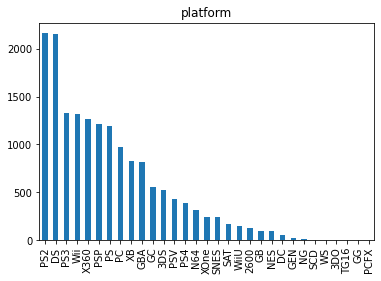

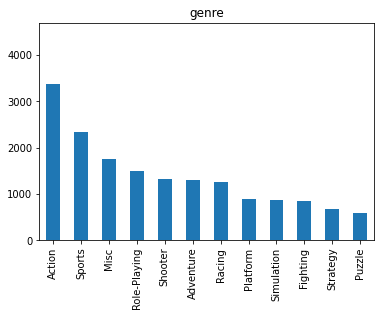

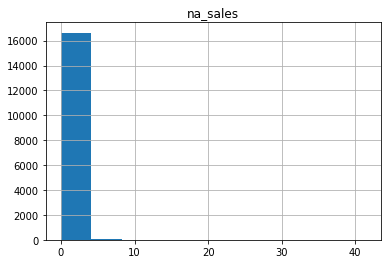

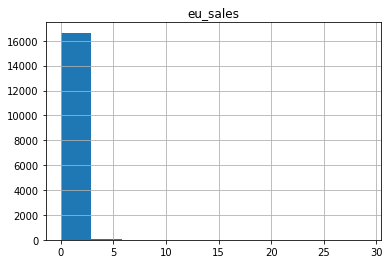

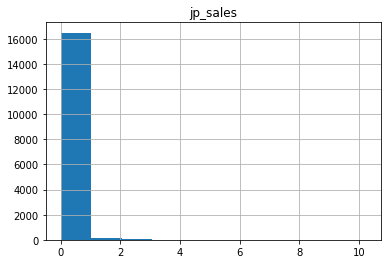

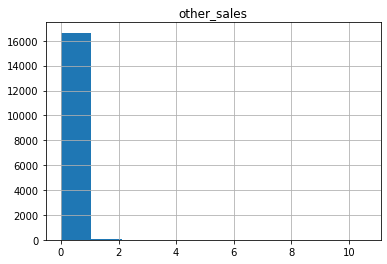

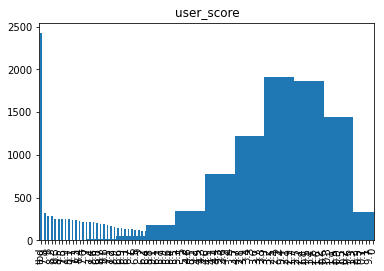

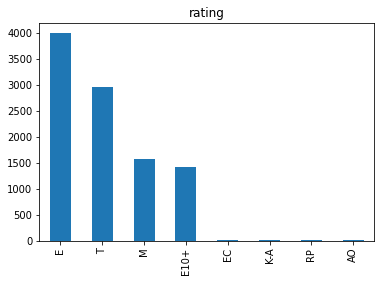

In [ ]:
columns = ['platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

for col in columns:
    try:
        data.hist(column=col)
    except ValueError:
        data[col].value_counts().plot(kind='bar', title=col)
        plt.show()

**Промежуточный вывод**

    Самые популярные платформы PS2 и DS
    Самый популярный жанр Action
    Число игр за 1 год со временем растет. Данные за 2015 могут быть неполными или просто локальная просадка.
    Число хороших игр (с оценкой 65 баллов от критиков) больше чем плохих.
    Больше всего игр с рейтингом E и T:
        - «E» («Everyone») - все
        - «T» («Teen») от 13 лет
        - «M» («Mature») от 17 и старше
        - «E10+» («Everyone 10 and older») - от 10 и старше
        - «EC» («Early childhood») - от 3 лет
        - «RP» («Rating Pending») - рейтинг ожидается
        - «AO» («Adults Only 18+») - только для взрослых - от 18 лет
        - "K-A" ("Kids to Adults") - для всех, тоже самое, что «E» («Everyone»). старый вариант

### Изучим пропуски в данных

In [ ]:
def df_na_percent(df):
    temp_df = pd.DataFrame(df.isna().sum())
    temp_df.columns =  ['na_count']
    temp_df['na_percent'] = round(temp_df['na_count'] / len(data) * 100,0)
    print(temp_df)

In [ ]:
df_na_percent(data)

                 na_count  na_percent
name                    2         0.0
platform                0         0.0
year_of_release       269         2.0
genre                   2         0.0
na_sales                0         0.0
eu_sales                0         0.0
jp_sales                0         0.0
other_sales             0         0.0
critic_score         8578        51.0
user_score           6701        40.0
rating               6766        40.0


### Описание пропусков

name - название игры - заполнить нельзя.

year_of_release - год выпуска - заполнить нельзя. могут быть игры с одинаковый названием и с разными годами выпуска.

genre - жанр - заполнить значением для данной игры на других платформах.

critical_score - оценка критиков - невозможно заполнить. для разных платформ оценки могут сильно отличаться.

user_score - оценка пользователей - невозможно заполнить. для разных платформ оценки могут сильно отличаться.

rating - возрастной рейтинг - заполнить значением для данной игры и данного года по другим платформам.

название, год игры и платформа определяют уникальность игры

Столбец user_score содержит значение `tbd`

`TBD` - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Акроним служит для отметки неясностей или пропусков

### Заполнение пропусков

In [ ]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

**Заполним жанр**

for name in data[data['genre'].isna()]['name']:
    genre = data[data['name']==name]['genre'].min()
    data.loc[data['name']==name,'genre'] = data.loc[data['name']==name,'genre'].fillna(genre)

**Жанры не удалось заполнить**


data_rating_na = data.query('rating.isna()')

for index, row in data_rating_na.iterrows():
    rows = ((data['name'] == row['name']) & (data['year_of_release'] == row['year_of_release']) & (data['rating'].notna()))
    rating = data.loc[rows, 'rating'].max()
    data.loc[rows, 'rating'] = data.loc[rows, 'rating'].fillna(rating)

**Рейтинг тоже не удалось эффективно заполнить.**

In [ ]:
data['rating'] = data['rating'].fillna('unknown')

In [ ]:
df_na_percent(data)

                 na_count  na_percent
name                    2         0.0
platform                0         0.0
year_of_release       269         2.0
genre                   2         0.0
na_sales                0         0.0
eu_sales                0         0.0
jp_sales                0         0.0
other_sales             0         0.0
critic_score         8578        51.0
user_score           9125        55.0
rating                  0         0.0


**Удалим игры без названия и без жанра**

In [ ]:
data = data.dropna(subset=['name','genre']).reset_index(drop=True)

### Изменение типов данных

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].astype('float64')

### Удаление явных дубликатов

In [ ]:
data.duplicated().sum()

0

полных дубликатов нет

**Проверка неявных дубликатов**


In [ ]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16228,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Неявные дубликаты есть. Можем:
- оставить 1 строчку
- сложить продажи в eu и оставить 1 строчку

Удалим неявный дубликат

In [ ]:
data = data.drop_duplicates(subset=['name', 'platform','year_of_release'])

In [ ]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
data.query("name == 'Madden NFL 13'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3985,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5886,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7065,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


### Анализ аномалий

Аномалий в данных не обнаружено из графиков выше

### Посчитаем суммарные продажи по всем регионам

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Вывод**

Датасет был проанализирован, обработан и привиден к стандартному виду:
- были переименованы столбцы
- заменены значения в столбце `user_score` - tbd на пустые
- заменены значения в столбце `rating` - пустые на  `unknown`
- проверены и удалены полные и неявные дубликаты (1 строка)
- удалены строки с пустыми значениями в столбцах `name` и `genre` (2 строки)
- приведены типы в столбцах `year_of_release` и `user_score`
- посчитали новый столбец `total_sales`

## Исследовательский анализ данных

### Распределение игр по годам

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

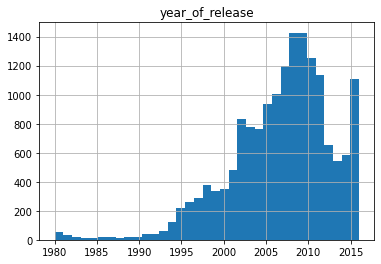

In [ ]:
data.hist(column='year_of_release', bins=35)
#plt.title('Выпуск игр в разные годы')

Из графика видно:
- начало выхода игр - 1980г.
- резкий рост игр - 2002г.
- пик выхода игр - 2008-2010гг.
- игровой провал - 2012-2014гг.
- второй пик - 2015г.

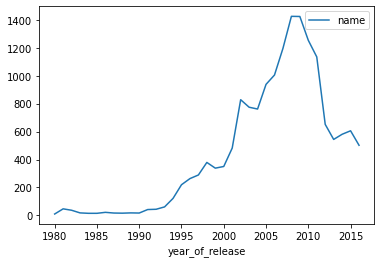

In [ ]:
data_groupby_year = data.groupby('year_of_release').agg({'year_of_release':'min', 'name':'count'})
data_groupby_year.plot.line(x='year_of_release', y='name')
plt.show()

### Проанализируем 10 популярных платформ

In [ ]:
data_top_platform = (data
                     .groupby('platform')
                     .agg({'platform':'min',
                           'name':'count',
                           'year_of_release':['min','max'],
                           'total_sales':'sum',
                           'na_sales':'sum',
                           'eu_sales':'sum',
                           'jp_sales':'sum'
                          })
                    )
data_top_platform.columns = ['platform','count','min_year', 'max_year', 'total_sales_sum', 'na_sales_sum', 'eu_sales_sum', 'jp_sales_sum']
data_top_platform['total_years'] = data_top_platform['max_year'] - data_top_platform['min_year']
data_top_platform_total = data_top_platform.sort_values(by='total_sales_sum', ascending=False).head(10)
data_top_platform_total

,platform,count,min_year,max_year,total_sales_sum,na_sales_sum,eu_sales_sum,jp_sales_sum,total_years
platform,,,,,,,,,
PS2,PS2,2161,2000,2011,1255.77,583.84,339.29,139.20,11
X360,X360,1262,2005,2016,971.42,602.47,270.76,12.43,11
PS3,PS3,1330,2006,2016,939.64,393.49,330.28,80.19,10
Wii,Wii,1320,2006,2016,907.51,496.90,262.21,69.33,10
DS,DS,2151,1985,2013,806.12,382.40,188.89,175.57,28
PS,PS,1197,1994,2003,730.86,336.52,213.61,139.82,9
GBA,GBA,822,2000,2007,317.85,187.54,75.25,47.33,7
PS4,PS4,392,2013,2016,314.14,108.74,141.09,15.96,3
PSP,PSP,1209,2004,2015,294.05,109.17,66.68,76.78,11


Для приставок игры продолжают выходить в среднем 10 лет.

Платформы SonyPlaystations меняются каждые 6 лет.

Игры на компьютер выходят и остаются на всегда.

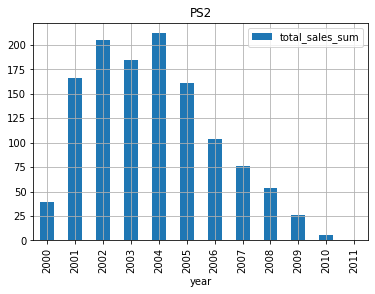

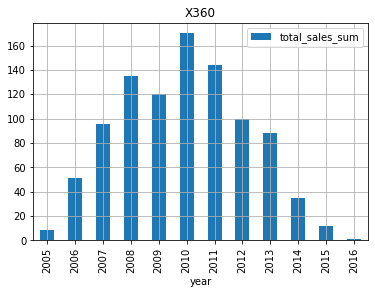

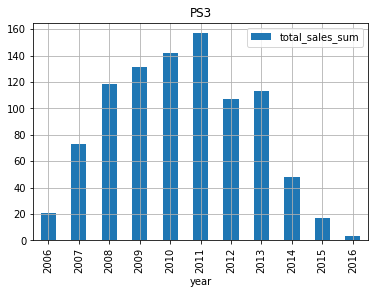

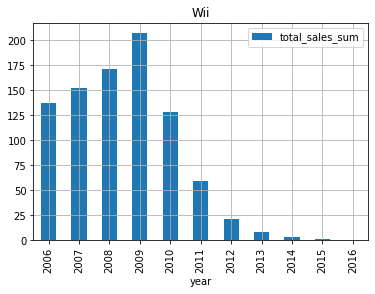

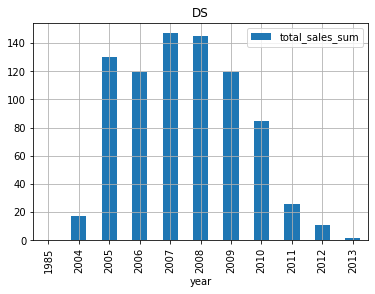

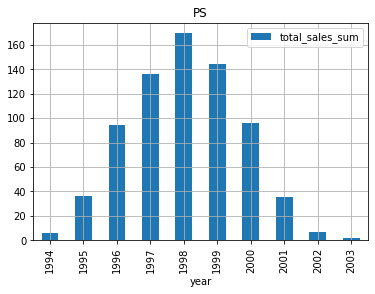

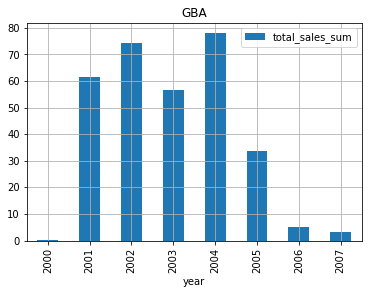

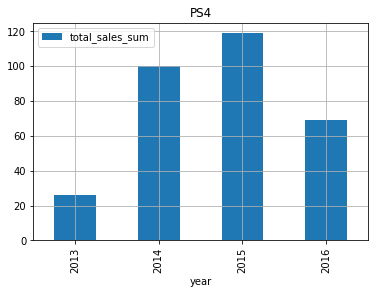

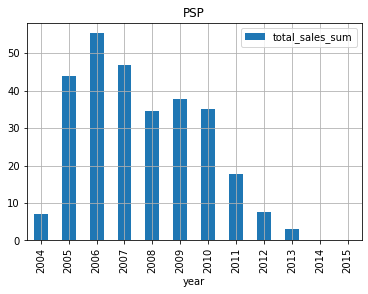

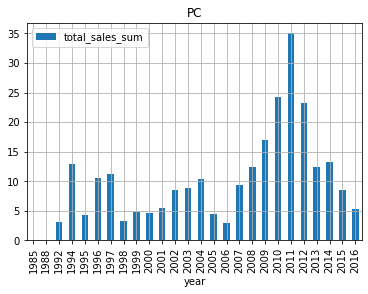

In [ ]:
for platform in data_top_platform_total['platform'].unique():
    data_temp =  (data
                  .loc[data['platform']  == platform]
                  .groupby('year_of_release')
                  .agg({'year_of_release':'min', 'total_sales':'sum'})
                  .reset_index(drop=True)
                 )
    data_temp.columns = ['year', 'total_sales_sum']
    data_temp.plot(x='year', y='total_sales_sum', kind='bar', grid=True, title=platform)
    plt.show()

Самые продаваемые платформы относятся к старым поколения, такие как: PS2, X360, PS3, Wii, DS, PS, GBA, PSP,
т.к. они существуют максимальный период времени,
но по графикам видно, что их продажи падают или игры вообще уже не продаются.

Платформы относящиеся к последний поколениям: PS4, PC и XOne. PS4 вышла в 2013 году.
Для дальнейшего анализа будем отталкиваться от даты появления последнего поколения PS4 - от 2013 года.


Из графиков выше видем, что платформа DS имеет запись в 1985г. На тот момент платформы не существовало, а значит эти данные ошибочны. Отфильтруем и удалим эти данные из датасета.

In [ ]:
data = data.query("platform != 'DS' or year_of_release != 1985")

### Построим график с усами по платформам

In [ ]:
data = data.query('year_of_release > 2012')

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не менее 2-х полных лет и не более 5 лет).

In [ ]:
data_top_platform = (data
                     .groupby('platform')
                     .agg({'platform':'min',
                           'name':'count',
                           'year_of_release':['min','max'],
                           'total_sales':'sum',
                           'na_sales':'sum',
                           'eu_sales':'sum',
                           'jp_sales':'sum'
                          })
                    )
data_top_platform.columns = ['platform','count','min_year', 'max_year', 'total_sales_sum', 'na_sales_sum', 'eu_sales_sum', 'jp_sales_sum']
data_top_platform['total_years'] = data_top_platform['max_year'] - data_top_platform['min_year']
data_top_platform_total = data_top_platform.sort_values(by='total_sales_sum', ascending=False).head(10)
data_top_platform_total

,platform,count,min_year,max_year,total_sales_sum,na_sales_sum,eu_sales_sum,jp_sales_sum,total_years
platform,,,,,,,,,
PS4,PS4,392,2013,2016,314.14,108.74,141.09,15.96,3
PS3,PS3,345,2013,2016,181.43,63.50,67.81,23.35,3
XOne,XOne,247,2013,2016,159.32,93.12,51.59,0.34,3
3DS,3DS,303,2013,2016,143.25,38.20,30.96,67.81,3
X360,X360,186,2013,2016,136.80,81.66,42.52,0.51,3
WiiU,WiiU,115,2013,2016,64.63,29.21,19.85,10.88,3
PC,PC,189,2013,2016,39.43,11.11,25.36,0.00,3
PSV,PSV,358,2013,2016,32.99,5.04,6.10,18.59,3
Wii,Wii,23,2013,2016,13.66,6.56,5.93,0.05,3


(2.0, 25.0)

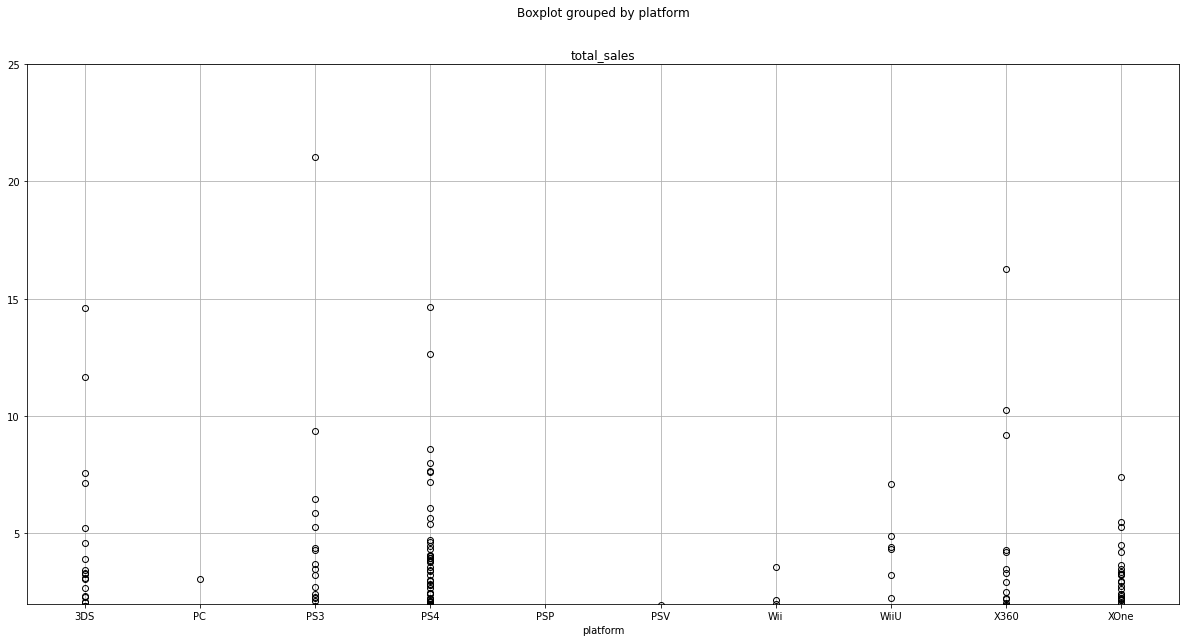

In [ ]:

ax = (data
    .query('platform in @data_top_platform_total.platform')
    .boxplot('total_sales', by='platform', figsize=(20, 10))
)
ax.set_ylim(2, 25)

(0.0, 2.0)

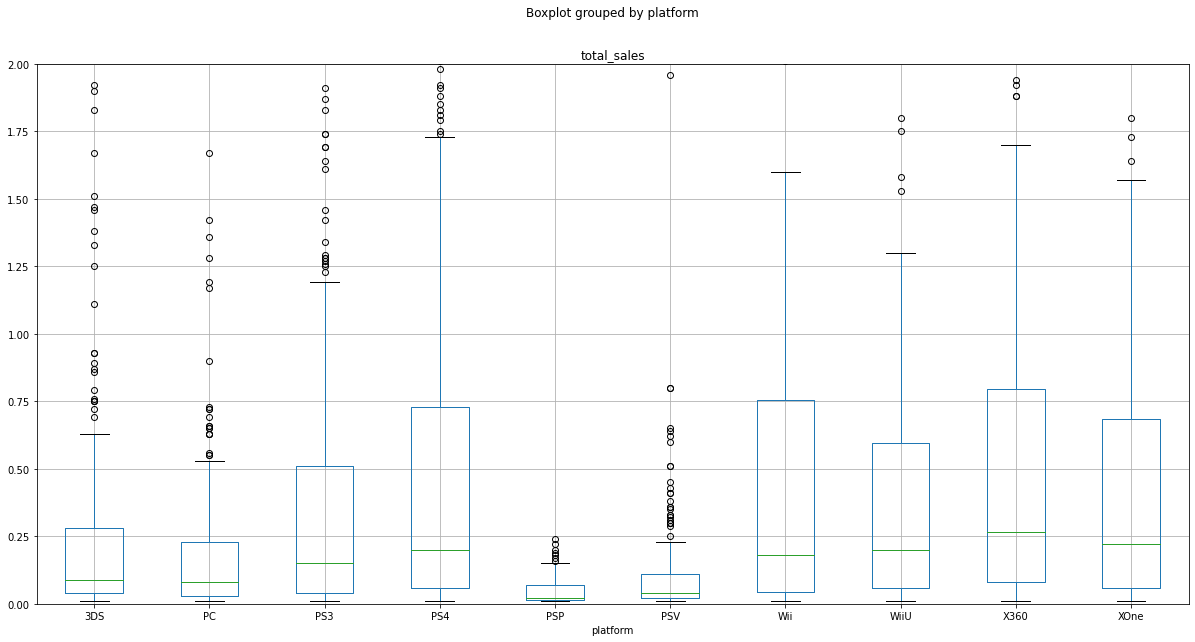

In [ ]:
ax = (data
    .query('platform in @data_top_platform_total.platform')
    .boxplot('total_sales', by='platform', figsize=(20, 10))
)
ax.set_ylim(0, 2)

In [ ]:
data.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


<AxesSubplot:title={'center':'Распределение самых продоваемых игр по платформам'}, ylabel='total_sales_sum'>

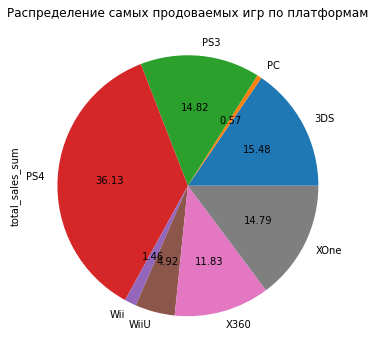

In [ ]:
data_top_sales = (data
                  .query('total_sales > 2')
                  .groupby('platform')
                  .agg({'platform':'min', 'total_sales':'sum'})
                 )
data_top_sales.columns = ['platform', 'total_sales_sum']
data_top_sales['total_sales_sum'].plot.pie(figsize=(6, 6),autopct="%.2f", title='Распределение самых продоваемых игр по платформам')

In [ ]:
data['is_top_sales'] = data['total_sales']  > 2
data_top_sales = data.groupby('platform').agg({'platform':'min', 'is_top_sales':'mean'})
data_top_sales.columns = ['platform', 'top_sales_prc']
data_top_sales['top_sales_prc'] = round(data_top_sales['top_sales_prc'] * 100,0)
data_top_sales = data_top_sales.sort_values(by='top_sales_prc', ascending=False)
data_top_sales

,platform,top_sales_prc
platform,,
Wii,Wii,13.0
PS4,PS4,11.0
XOne,XOne,10.0
3DS,3DS,6.0
X360,X360,6.0
WiiU,WiiU,5.0
PS3,PS3,4.0
PC,PC,1.0
DS,DS,0.0


**Выводы**

1. Распределение самых продоваемых (больше 2 млн копий) игр по платформам :
    - PS4 - 36.13%
    - 3DS - 15.48%
    - PS3 - 14.82%
    - XOne - 14.79%
    - X360 - 11.83 %
    
    ,от общего числа самых продаваемых игр на всех платформах.
    
    
2. Топ платформ с высокой долей игр с высокими продажами (больше 2 млн копий):
    - Wii	13%
    - PS4	11%
    - XOne	10%
    - 3DS	6%
    - X360	6%
    
    
3. По диаграмме размаха видно, что у платформ PlayStation разных поколений,Xbox и Wii медиана продаж игр больше, чем у других.

4. Из этого же графика видно, что игры на PC продаются плохо, хотя эта платформа самая распространненная в мире.

### Проанализируем корреляцию отзывов и продаж для PS4

<function matplotlib.pyplot.show(close=None, block=None)>

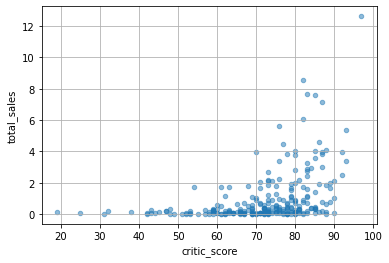

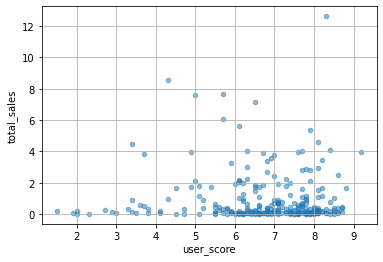

In [ ]:
data_ps4 = data.query("platform == 'PS4'")
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid=True)
plt.show

data_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True)
plt.show

In [ ]:
data_ps4[['critic_score', 'user_score']].corrwith(data_ps4['total_sales'])

critic_score    0.406568
user_score     -0.031957
dtype: float64

**Вывод**

Для PS4 существует слабая прямая корреляция между оценкой критиков и кол-вом продаж. Влияния пользовательской оценки нет.

### Сравним результаты корреляции оценок для других платформ

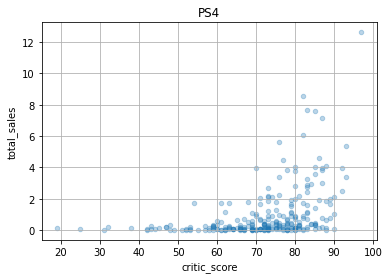

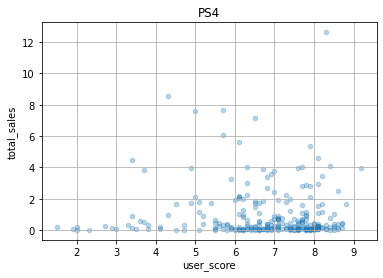

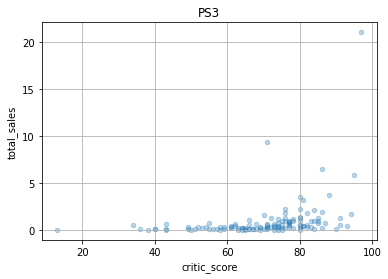

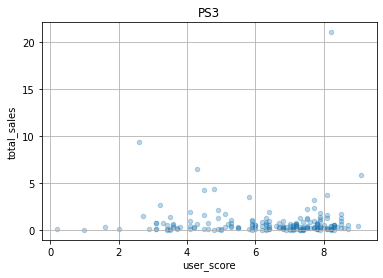

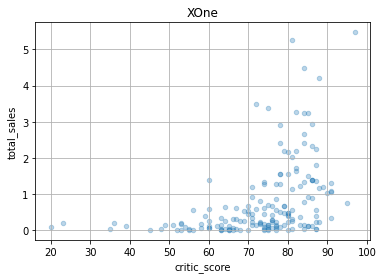

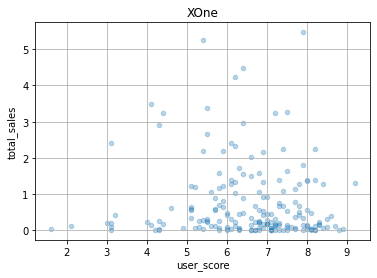

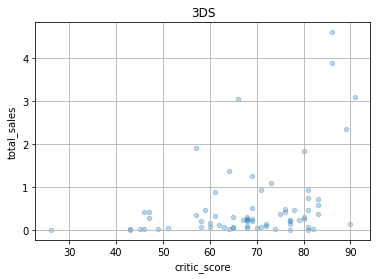

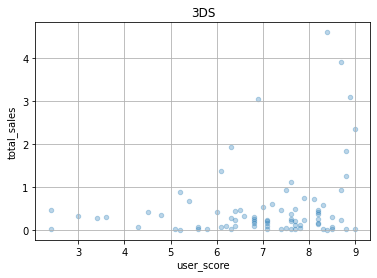

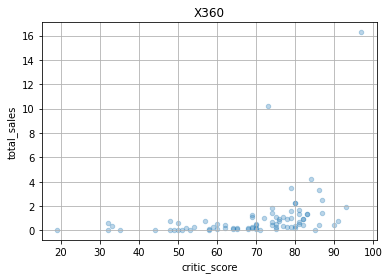

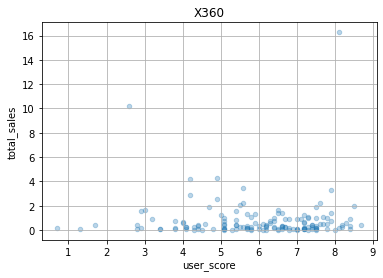

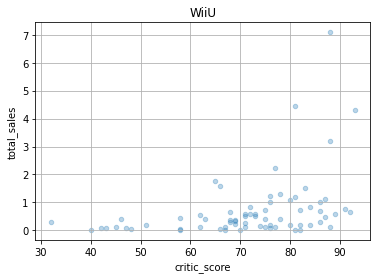

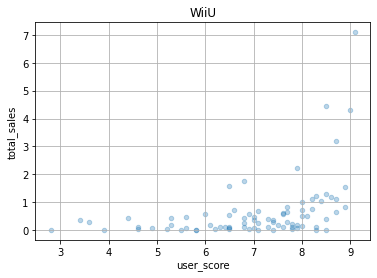

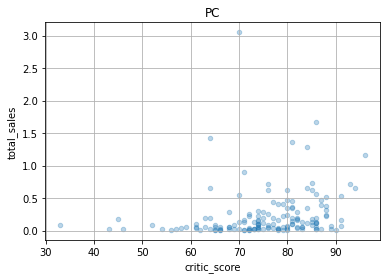

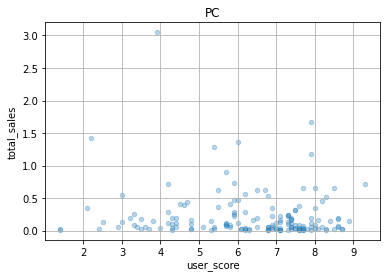

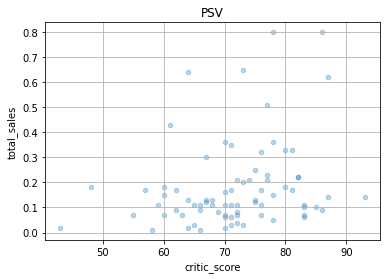

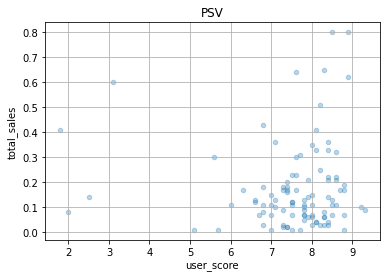

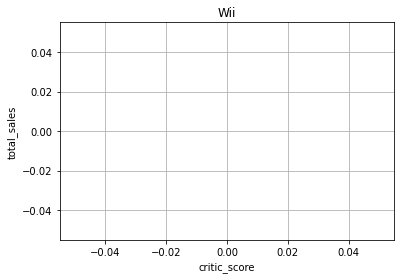

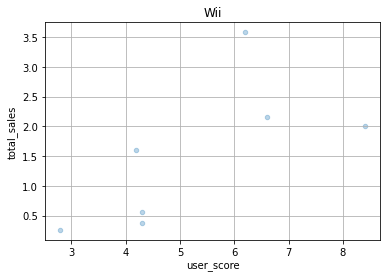

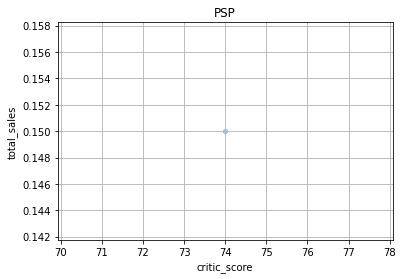

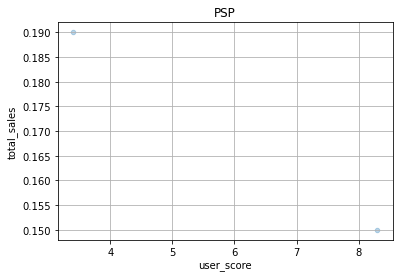

In [ ]:
for platform in data_top_platform_total['platform'].unique():
    data_temp = data.query("platform == @platform")
    data_temp.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, grid=True, title=platform)
    plt.show

    data_temp.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, grid=True, title=platform)
    plt.show

In [ ]:
for platform in data_top_platform_total['platform'].unique():
    print('---------------------')
    print('Платформа:', platform)
    print('---------------------')
    data_temp = data.query("platform == @platform and critic_score.notna()")
    print(data_temp[['critic_score']].corrwith(data_temp['total_sales']))

    data_temp = data.query("platform == @platform and user_score.notna()")
    print(data_temp[['user_score']].corrwith(data_temp['total_sales']))

    print('')

---------------------
Платформа: PS4
---------------------
critic_score    0.406568
dtype: float64
user_score   -0.031957
dtype: float64

---------------------
Платформа: PS3
---------------------
critic_score    0.334285
dtype: float64
user_score    0.002394
dtype: float64

---------------------
Платформа: XOne
---------------------
critic_score    0.416998
dtype: float64
user_score   -0.068925
dtype: float64

---------------------
Платформа: 3DS
---------------------
critic_score    0.357057
dtype: float64
user_score    0.241504
dtype: float64

---------------------
Платформа: X360
---------------------
critic_score    0.350345
dtype: float64
user_score   -0.011742
dtype: float64

---------------------
Платформа: WiiU
---------------------
critic_score    0.376415
dtype: float64
user_score    0.41933
dtype: float64

---------------------
Платформа: PC
---------------------
critic_score    0.19603
dtype: float64
user_score   -0.093842
dtype: float64

---------------------
Платформа: P

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


**Вывод**

Анализ корреляция для других платформ подтверждает выводы для PS4.

    1. Оценка критиков имеет слабую корреляцию
    2. Оценка пользователей не влияет на продажу игр


### Проведем анализ популярности игровых жанров

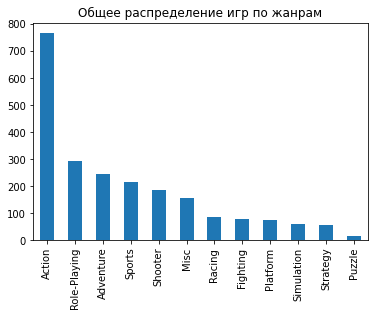

In [ ]:
data['genre'].value_counts().plot(kind='bar', title='Общее распределение игр по жанрам')
plt.show()

In [ ]:
data_top_genre = (data
                  .groupby('genre')
                  .agg({'genre':'min',
                        'name':'count',
                        'total_sales':'sum',
                        'na_sales':'sum',
                        'eu_sales':'sum',
                        'jp_sales':'sum'

                       })
                 )

data_top_genre.columns = ['genre','count', 'total_sales_sum', 'na_sales_sum', 'eu_sales_sum', 'jp_sales_sum']
data_top_genre['count_prc'] = round(data_top_genre['count'] / data_top_genre['count'].sum() * 100)
data_top_genre['avg_sales'] = data_top_genre['total_sales_sum'] / data_top_genre['count']
data_top_genre = data_top_genre.sort_values(by='total_sales_sum', ascending=False)
print('Самые прибыльные жанры')
data_top_genre

Самые прибыльные жанры


,genre,count,total_sales_sum,na_sales_sum,eu_sales_sum,jp_sales_sum,count_prc,avg_sales
genre,,,,,,,,
Action,Action,766,321.87,126.05,118.13,40.49,34.0,0.420196
Shooter,Shooter,187,232.98,109.74,87.86,6.61,8.0,1.245882
Sports,Sports,214,150.65,65.27,60.52,5.41,10.0,0.703972
Role-Playing,Role-Playing,292,145.89,46.40,36.97,51.04,13.0,0.499623
Misc,Misc,155,62.82,27.49,20.04,9.20,7.0,0.405290
Platform,Platform,74,42.63,18.14,15.58,4.79,3.0,0.576081
Racing,Racing,85,39.89,12.96,20.19,2.30,4.0,0.469294
Fighting,Fighting,80,35.31,15.55,8.55,7.65,4.0,0.441375
Adventure,Adventure,245,23.64,7.14,8.25,5.82,11.0,0.096490


(0.0, 2.0)

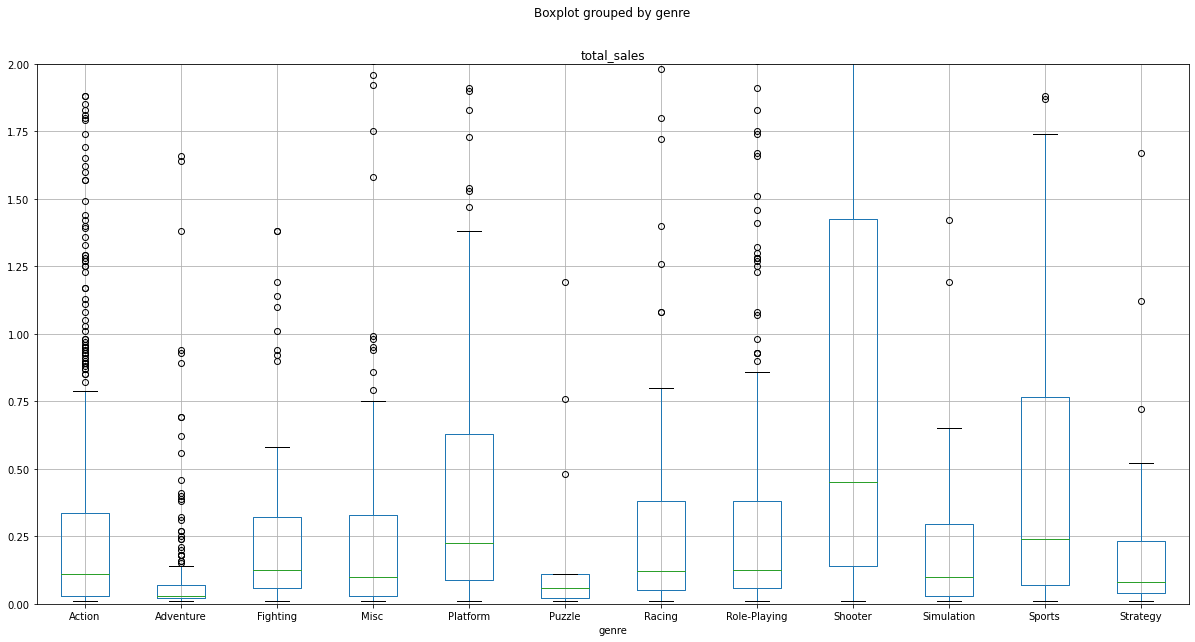

In [ ]:
ax = data.boxplot('total_sales', by='genre', figsize=(20, 10))
ax.set_ylim(0, 2)

<AxesSubplot:title={'center':'Общая доля игр на платформах'}, ylabel='count_prc'>

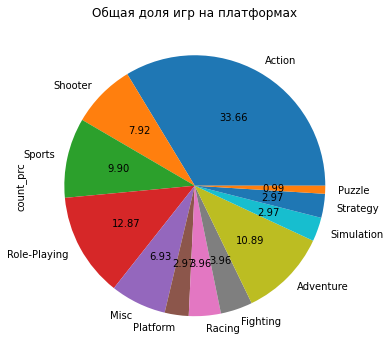

In [ ]:
data_top_genre['count_prc'].plot.pie(figsize=(6, 6),autopct="%.2f", title='Общая доля игр на платформах')

**Выводы**

1.Самые популярные жанры:

- Action - 34%
- Role-Playing - 13%
- Adventure - 11%
- Sports - 10%
- Shooter - 8%

2. Самые продаваемые жанры:

- Shooter
- Sports
- Platform
- Role-Playing
- Racing


С высокими продажами выделяется жанр `Shooter`. Каждая игра стабильно продается почти по 1.24 млн. копий.

Самый плохо продаваемый жанр - `Adventure`. Несмотря на то, что игр выходи много - продаются они мало.
  

## Исследования портрета покупателя в регионах (NA, EU, JP)

### Самые популярные платформы по регионам

In [ ]:
def plot_pie(df, groupby_col, value_col, title_name):
    temp_df = df.sort_values(by=value_col, ascending=False)
    temp_top5 = temp_df.head(5)[[groupby_col, value_col]]
    temp_top5.reset_index(drop=True)

    val = temp_df.query(groupby_col + " not in @temp_top5."+groupby_col)[value_col].sum()
    temp_top5.loc['Other'] = ['Other', val]

    temp_top5[value_col].plot(kind='pie', autopct="%.f", title=title_name)
    plt.show()

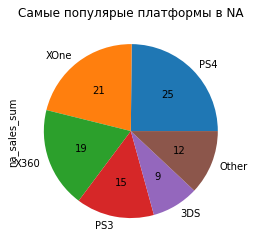

In [ ]:
plot_pie(data_top_platform, 'platform', 'na_sales_sum', 'Самые популярые платформы в NA')

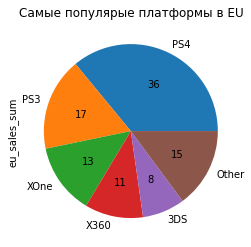

In [ ]:
plot_pie(data_top_platform, 'platform', 'eu_sales_sum', 'Самые популярые платформы в EU')

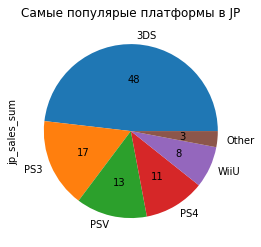

In [ ]:
plot_pie(data_top_platform, 'platform', 'jp_sales_sum', 'Самые популярые платформы в JP')

In [ ]:
data_top_platform_na = data_top_platform.sort_values(by='na_sales_sum', ascending=False)
data_top_platform_eu = data_top_platform.sort_values(by='eu_sales_sum', ascending=False)
data_top_platform_jp = data_top_platform.sort_values(by='jp_sales_sum', ascending=False)

data_top_platform_na['na_sales_prc'] = round(data_top_platform_na['na_sales_sum'] / data_top_platform_na['na_sales_sum'].sum() * 100)
data_top_platform_eu['eu_sales_prc'] = round(data_top_platform_eu['eu_sales_sum'] / data_top_platform_eu['eu_sales_sum'].sum() * 100)
data_top_platform_jp['jp_sales_prc'] = round(data_top_platform_jp['jp_sales_sum'] / data_top_platform_jp['jp_sales_sum'].sum() * 100)

In [ ]:
data_top_platform_na = data_top_platform_na.head(5)
data_top_platform_eu = data_top_platform_eu.head(5)
data_top_platform_jp = data_top_platform_jp.head(5)

In [ ]:
print('Доля платформ по продажам в NA')
data_top_platform_na[['platform','na_sales_prc']]

Доля платформ по продажам в NA


,platform,na_sales_prc
platform,,
PS4,PS4,25.0
XOne,XOne,21.0
X360,X360,19.0
PS3,PS3,15.0
3DS,3DS,9.0


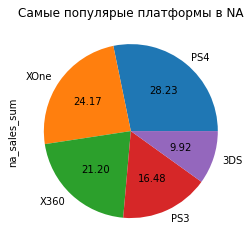

In [ ]:
data_top_platform_na['na_sales_sum'].plot(kind='pie', autopct="%.2f", title='Самые популярые платформы в NA')
plt.show()

In [ ]:
print('Доля платформ по продажам в EU')
data_top_platform_eu[['platform','eu_sales_prc']]

Доля платформ по продажам в EU


,platform,eu_sales_prc
platform,,
PS4,PS4,36.0
PS3,PS3,17.0
XOne,XOne,13.0
X360,X360,11.0
3DS,3DS,8.0


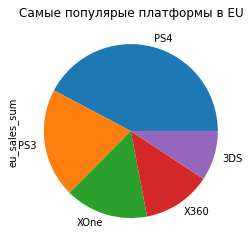

In [ ]:
data_top_platform_eu['eu_sales_sum'].plot(kind='pie', title='Самые популярые платформы в EU')
plt.show()

In [ ]:
print('Доля платформ по продажам в JP')
data_top_platform_jp[['platform','jp_sales_prc']]

Доля платформ по продажам в JP


,platform,jp_sales_prc
platform,,
3DS,3DS,48.0
PS3,PS3,17.0
PSV,PSV,13.0
PS4,PS4,11.0
WiiU,WiiU,8.0


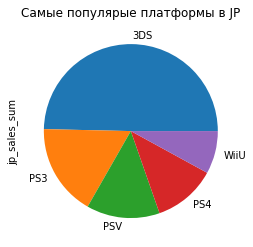

In [ ]:
data_top_platform_jp['jp_sales_sum'].plot(kind='pie', title='Самые популярые платформы в JP')
plt.show()

**Вывод**

В регионах NA и EU преобладают консоли PlayStation и Xbox. В NA лагери Xbox и PS делятся попалам. В регионе EU больше превалирует платформа PlayStation.

В JP преобладают приставки Nintendo

### Самые популярные жанры по регионам

In [ ]:
data_top_genre_na = data_top_genre.sort_values(by='na_sales_sum', ascending=False)
data_top_genre_eu = data_top_genre.sort_values(by='eu_sales_sum', ascending=False)
data_top_genre_jp = data_top_genre.sort_values(by='jp_sales_sum', ascending=False)

data_top_genre_na['na_sales_prc'] = round(data_top_genre_na['na_sales_sum'] / data_top_genre_na['na_sales_sum'].sum() * 100)
data_top_genre_eu['eu_sales_prc'] = round(data_top_genre_eu['eu_sales_sum'] / data_top_genre_eu['eu_sales_sum'].sum() * 100)
data_top_genre_jp['jp_sales_prc'] = round(data_top_genre_jp['jp_sales_sum'] / data_top_genre_jp['jp_sales_sum'].sum() * 100)

In [ ]:
data_top_genre_na = data_top_genre_na.head(5)
data_top_genre_eu = data_top_genre_eu.head(5)
data_top_genre_jp = data_top_genre_jp.head(5)

In [ ]:
print('Доля жанров по продажам в NA')
data_top_genre_na[['genre','na_sales_prc']]

Доля жанров по продажам в NA


,genre,na_sales_prc
genre,,
Action,Action,29.0
Shooter,Shooter,25.0
Sports,Sports,15.0
Role-Playing,Role-Playing,11.0
Misc,Misc,6.0


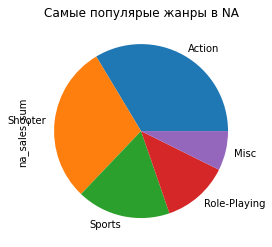

In [ ]:
data_top_genre_na['na_sales_sum'].plot(kind='pie', title='Самые популярые жанры в NA')
plt.show()

In [ ]:
print('Доля жанров по продажам в EU')
data_top_genre_eu[['genre','eu_sales_prc']]

Доля жанров по продажам в EU


,genre,eu_sales_prc
genre,,
Action,Action,30.0
Shooter,Shooter,22.0
Sports,Sports,15.0
Role-Playing,Role-Playing,9.0
Racing,Racing,5.0


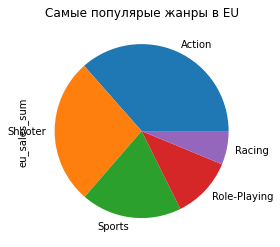

In [ ]:
data_top_genre_eu['eu_sales_sum'].plot(kind='pie', title='Самые популярые жанры в EU')
plt.show()

In [ ]:
print('Доля жанров по продажам в JP')
data_top_genre_jp[['genre','jp_sales_prc']]

Доля жанров по продажам в JP


,genre,jp_sales_prc
genre,,
Role-Playing,Role-Playing,36.0
Action,Action,29.0
Misc,Misc,7.0
Fighting,Fighting,5.0
Shooter,Shooter,5.0


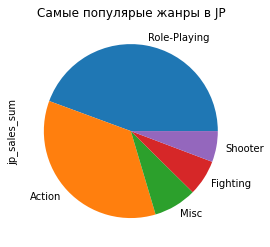

In [ ]:
data_top_genre_jp['jp_sales_sum'].plot(kind='pie', title='Самые популярые жанры в JP')
plt.show()

**Вывод**

Жанры, которые популярны во всем мире:
- Action
- Role-Playing
- Shooter

В регионах NA и EU к самым популярным так же можно добавить жанр `Sports`.
Главное отличие в регионах: в NA так же предпочитают жанр `Misc`, а в EU любят `Racing`

В JP популярность жанров похожая. Но имеется 2 отличия. В JP самым популярным жанром является `Role-playing`, а так же в топ попадает `Fighting`.



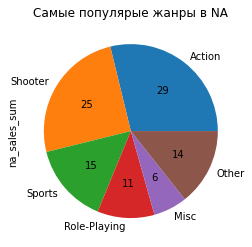

In [ ]:
plot_pie(data_top_genre, 'genre', 'na_sales_sum', 'Самые популярые жанры в NA')

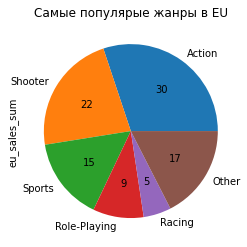

In [ ]:
plot_pie(data_top_genre, 'genre', 'eu_sales_sum', 'Самые популярые жанры в EU')

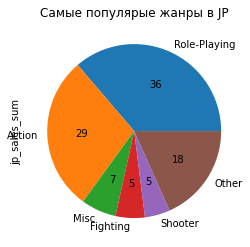

In [ ]:
plot_pie(data_top_genre, 'genre', 'jp_sales_sum', 'Самые популярые жанры в JP')

NA и EU во многом схожи, в то время, как Япония более самобытна.

### Влияние рейтинга ESRB на продажи по регионам

In [ ]:
data_rating = (data
               .groupby('rating')
               .agg({'rating':'min',
                     'na_sales':'sum',
                     'eu_sales':'sum',
                     'jp_sales':'sum'
                    })
              )
data_rating.columns = ['rating', 'na_sales_sum', 'eu_sales_sum', 'jp_sales_sum']

In [ ]:
def plot_rating_bar(name):
    data_temp = data_rating.sort_values(by=name, ascending=False)
    plt.bar(x=data_temp.index, height=data_temp[name])

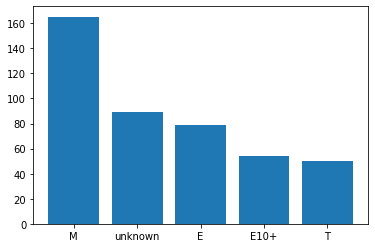

In [ ]:
plot_rating_bar('na_sales_sum')

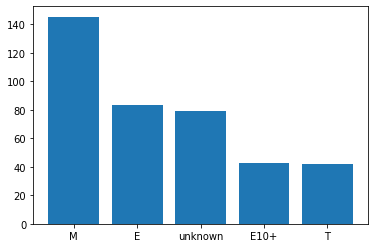

In [ ]:
plot_rating_bar('eu_sales_sum')

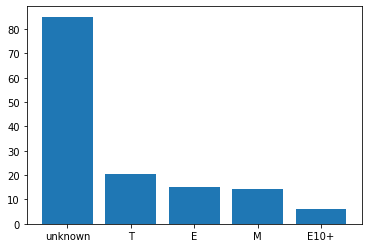

In [ ]:
plot_rating_bar('jp_sales_sum')

**Вывод**

Для регионов NA и EU результаты одинаковые. Лучше всего продаются игры с рейтингом «M» («Mature») от 17 и старше

Для регоина JP лучше всего продаются игры с рейтингом «Unknown», т.е. рейтинги не работают в JP. Много локальных игр.

## Статистический анализ данных и проверка гипотез

Проверим несколько гипотез

### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Гипотизы**

H0 - Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Cредние пользовательские рейтинги платформ Xbox One и PC различные

In [ ]:
data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [ ]:
data_xboxone = data.query("platform == 'XOne' and user_score.notna()")
data_pc = data.query("platform == 'PC' and user_score.notna()")

In [ ]:
print('Длина выборки для платформы Xbox One:', len(data_xboxone['user_score']))
print('Длина выборки для платформы PC:', len(data_pc['user_score']))

Длина выборки для платформы Xbox One: 182
Длина выборки для платформы PC: 155


In [ ]:
alpha = 0.01

results = st.ttest_ind(data_xboxone['user_score'], data_pc['user_score'], equal_var = True)

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравните получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


<AxesSubplot:>

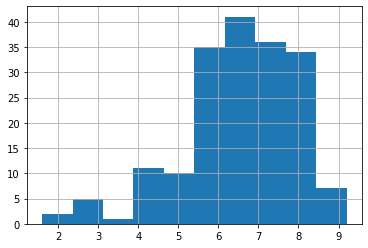

In [ ]:
data_xboxone['user_score'].hist()

<AxesSubplot:>

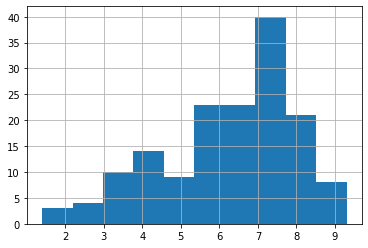

In [ ]:
data_pc['user_score'].hist()

**Вывод**

Мы принимаем нулевую гипотизу. Средние пользовательские рейтинги на платформах Xbox One  и PC одинаковые.

Параметр equal_var = True. Выборки одинаковые по размеру.

Мы сравниваем results.pvalue < alpha, т.к. если pvalue меньше, чем уровень статистической значимости, то найденное расстояние средних оценок на двух платформах очень большое и гипотеза тогда отрицается, т.е. средние оценки слишком разные.

### Cредние пользовательские рейтинги жанров Action и Sports разные.

**Гипотизы**

H0 - Cредние пользовательские рейтинги жанров Action и Sports одинаковые

H1 - Cредние пользовательские рейтинги жанров Action и Sports разные

In [ ]:
data['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [ ]:
data_action = data.query("genre == 'Action' and user_score.notna()")
data_sports = data.query("genre == 'Sports' and user_score.notna()")

In [ ]:
print('Длина выборки для жанра Action:', len(data_action['user_score']))
print('Длина выборки для жанра Sports:', len(data_sports['user_score']))

Длина выборки для жанра Action: 389
Длина выборки для жанра Sports: 160


In [ ]:
alpha = 0.01

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var = False)

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравните получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


<AxesSubplot:>

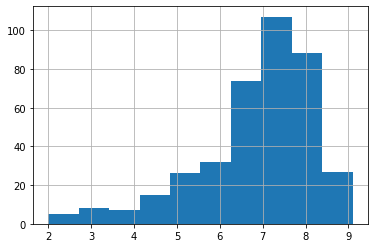

In [ ]:
data_action['user_score'].hist()

<AxesSubplot:>

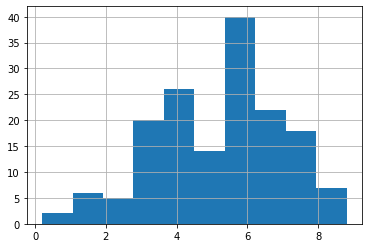

In [ ]:
data_sports['user_score'].hist()

**Вывод**

Мы отвергаем нулевую гипотизу. Cредние пользовательские рейтинги жанров Action и Sports разные.

Параметр equal_var = False. Выборки разного размера.

results.pvalue < alpha - проверяем, если значение меньше чем уровень значимости, то средние оценки различны и нулевая гипотеза о равенстве средних оценок отвергается.

## Общий вывод

В данном исследовании были проанализированы данные продаж игр интеренет-магазина «Стримчик».

1. База данных была обработана, устранены пропущенные значения, данные приведены к оптимальным форматам.


2. Был рассчитан новый показатель - глобальные продажи - total_sales


3. Был проведен анализ самых популярных платформ и получены выводы:
    - игры продолжают выходить на приставки в среднем 10 лет
    - поколения платформ меняются каждые 6 лет
    - последнее поколение появилось в 2013г. на текущий момент самые актуальные платформы: PS4, XOne, Wii и PC
    - платформы PlayStation разных поколений,Xbox и Wii лидируют по продажам
    - игры на PC продаются не так хорошо и по сравнению с лидерами сильно отстает.
    

4. Был проведен анализ влияние оценок критиков и игроков для популярных платформ.
    - оценки критиков слабо помогают продажам
    - оценки игроков никак не влияют на продажи
    

5. Анализ популярности жанров показал:
    - Самый продаваемый жанр Shooter
    - Хуже всего продается жанр Adventure

    5.1 по регионам:
    - Action, Role-Playing, Shooter - лидеры во всем мире
    - NA так же любят: Misc и Sports
    - EU: Racing и Sports
    - JP: для данного региона безоговорочным лидером является Role-Playing, данные жанр сильно опережает по продажам другие. Так же здесь ллюбят Fighting
    

6.
    - В регионах NA и EU преобладают консоли PlayStation и Xbox.
        - В NA лагери Xbox и PS делятся попалам.
        - В регионе EU больше превалирует платформа PlayStation.

    - В JP преобладают приставки Nintendo
    
    
7.
    - В регионах NA и EU лучше всего продаются игры с рейтингом «M» («Mature») от 17 и старше.
    - В регионе JP лучше всего продаются игры с рейтингом «Unknown», т.е. рейтинги не работают в  JP. Много локальных игр.
    
    
8. Была проверена гипотеза о **схожести** пользовательских рейтингов на платформах XOne и PC. Данная гипотеза подтвердилась.


9. Была проверена гипотеза о **различии** пользовательских  рейтингов в жанрах Action и Sports. Данная гипотеза подтвердилась.


Общая рекомендация - использовать полученные результаты для  планирования продаж игр на 2017г. Необходимо учитывать разные предпочтения игр по регионам.